# Table of contents
0. Introduction  
    0.1. Load the dataset  
    * missing value 확인 및 처리
    * statistical value 확인
    * Label의 class 종류 및 count 확인
    * correlations 확인
1. DL  
   1.0.0. Split the dataset
   *  into features(X) and label(y)
   *  into X_train, X_test, y_train, y_test
   
   1.0.1. Standardization
     
   1.1. CNN; Convolutional Neural Network
   * Convert to Sequential Data

# 0. Introduction

**Dataset**  
* [diabetes(당뇨병)](https://github.com/MyungKyuYi/AI-class/blob/main/diabetes.csv)

**Environment**
* macOS `x86`cpu

**Framework**  
* TensorFlow: Version `2.10.0`

**Dependencies**  
* Python: Version `3.9.19`
* Numpy: Version `1.24.3`
* Pandas: Version `2.2.2`
* Matplotlib: Version `3.9.2`
* scikit-learn: Version `1.2.2`

**Purpose**
* 당뇨병 데이터에 대해서 CNN을 사용하여 Classification 진행한다.

**Accuracy 비교 자료**
* [Automated detection of diabetes using CNN and CNN-LSTM network and heart rate signals - ScienceDirect](https://www.sciencedirect.com/science/article/pii/S1877050918307737)  
  -> 0.77 ~ 0.84

## 0.1. Load the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Load the dataset
df = pd.read_csv('./datasets/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# 1. 기존에 label로 사용하던 'Outcome' 삭제
# 2. dataset을 확인할 때의 편의를 위해서 label로 사용할 'BMI'를 가장 마지막 column으로 이동시키기
tmp_BMI = df['BMI']
df = df.drop(['BMI', 'Outcome'], axis=1)
print("======= df.drop 진행 =======")
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns}")

# 해당 cell에서는 '1.'만 진행, 아래 cell에서 이어서 '2.'를 진행

======= df.drop 진행 =======
Shape: (768, 7)
Columns: Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


In [4]:
# (이어서)2. 가장 마지막 column에 'BMI'를 추가

# 현재 df의 Shape에서 column이 7개임을 알 수 있음.
# 이때 column index는 0부터 시작하므로 현재 마지막 column의 index는 6임.
# df의 / 7번 index 자리에 / 'BMI'라는 column name으로 / tmp_BMI 데이터를 insert
df.insert(7, 'BMI', tmp_BMI)
df

# 'BMI' column을 기존 6번 째(index 5)에서 마지막으로 변경함

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age,BMI
0,6,148,72,35,0,0.627,50,33.6
1,1,85,66,29,0,0.351,31,26.6
2,8,183,64,0,0,0.672,32,23.3
3,1,89,66,23,94,0.167,21,28.1
4,0,137,40,35,168,2.288,33,43.1
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,0.171,63,32.9
764,2,122,70,27,0,0.340,27,36.8
765,5,121,72,23,112,0.245,30,26.2
766,1,126,60,0,0,0.349,47,30.1


> **cf. [pandas.DataFrame.insert — pandas 2.2.2 documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.insert.html)**  
`DataFrame.insert(loc, column, value, allow_duplicates=NoDefault.no_default)`  
Insert column into DataFrame at specified location.

In [5]:
# dataset의 shape, columns 확인
print(f"Shape  : {df.shape}")
print(f"Columns: {df.columns}")

# 해당 dataset은 column의 수가 많지 않지만, 수십 개의 columns가 존재하는 경우라면,
# df나 df.describe()로 한 눈에 확인하기 어려움

Shape  : (768, 8)
Columns: Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'DiabetesPedigreeFunction', 'Age', 'BMI'],
      dtype='object')


In [6]:
# features description
'''
| Pregnancies               | 임신 횟수
| Glucose                   | 글루코스
| BloodPressure             | 혈압
| SkinThickness             | 삼두근 부위 피부 두께
| Insulin                   | 인슐린 수치
| BMI                       | BMI 수치
| DiabetesPedigreeFunction  | 당뇨 유전병 인자 함수
| Age                       | 나이
| Outcome                   | 당뇨 유무
'''

'\n| Pregnancies               | 임신 횟수\n| Glucose                   | 글루코스\n| BloodPressure             | 혈압\n| SkinThickness             | 삼두근 부위 피부 두께\n| Insulin                   | 인슐린 수치\n| BMI                       | BMI 수치\n| DiabetesPedigreeFunction  | 당뇨 유전병 인자 함수\n| Age                       | 나이\n| Outcome                   | 당뇨 유무\n'

In [7]:
# Check the missing value

# sol1. DataFrame.info()는 Non-Null Count & Dtype을 리턴함
print(df.info())
print("\n\n")

# sol2. DataFrame.isnull().sum()은 Null Count를 리턴함 -> Null 확인에는 더 직관적임
print(df.isnull().sum())
print("\n\n")

# sol3. 또한 이를 응용하여 dataset 전체에 null이 존재하는지 여부를 출력하는 if statement를 작성 가능
if (df.isnull().sum().sum() == 0): 
    print("There are no missing values.")
else:
    print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   BMI                       768 non-null    float64
dtypes: float64(2), int64(6)
memory usage: 48.1 KB
None



Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
DiabetesPedigreeFunction    0
Age                         0
BMI                         0
dtype: int64



There are no missing values.


In [8]:
# missing value 처리하기
# null이 존재한다면 자동으로 처리하는 if statement를 작성 가능.
# 해당 예제에서는 missing value를 '제거'하도록 작성함. 이외에도 missing value 처리 방법은 다양함.
if (df.isnull().sum().sum() == 0):
    print("There are no missing values.")
else:
    print("missing values가 존재하여 처리합니다. \n처리 방법: 삭제")
    df = df.dropna()

# 해당 dataset에는 missing value가 존재하지 않기 때문에 별도로 작동하지는 않음

There are no missing values.


> **cf. [pandas.DataFrame.dropna — pandas 2.2.2 documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)**  
`DataFrame.dropna(*, axis=0, how=_NoDefault.no_default, thresh=_NoDefault.no_default, subset=None, inplace=False, ignore_index=False)`  
Remove missing values.

> **cf. [누락 데이터(Missing value)를 처리하는 7가지 방법 / Data Imputation - 밥먹는 개발자](https://dining-developer.tistory.com/19)**

In [9]:
# DataFrame.describe()는 dataset에 대한 statistical values를 제공함
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age,BMI
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,0.471876,33.240885,31.992578
std,3.369578,31.972618,19.355807,15.952218,115.244002,0.331329,11.760232,7.884160
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,0.243750,24.000000,27.300000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,0.372500,29.000000,32.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,0.626250,41.000000,36.600000
max,17.000000,199.000000,122.000000,99.000000,846.000000,2.420000,81.000000,67.100000


> **cf. [numpy.unique — NumPy v2.1 Manual](https://numpy.org/doc/stable/reference/generated/numpy.unique.html)**  
Find the unique elements of an array.  
Returns the sorted unique elements of an array.  
There are three optional outputs in addition to the unique elements:  
> * the indices of the input array that give the unique values
> * the indices of the unique array that reconstruct the input array
> * the number of times each unique value comes up in the input array

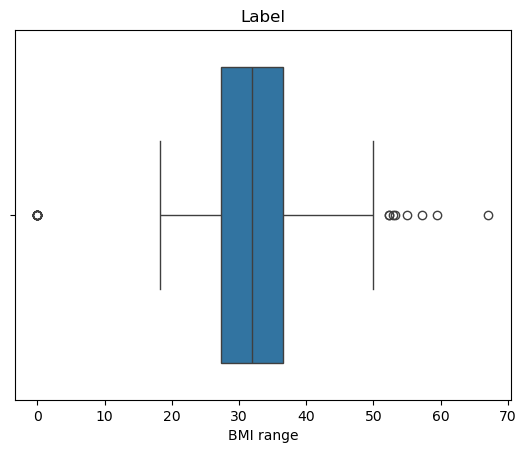

In [10]:
# Check the label range
sns.boxplot(data=df, x='BMI')
plt.xlabel('BMI range')
plt.title('Label')
plt.show()

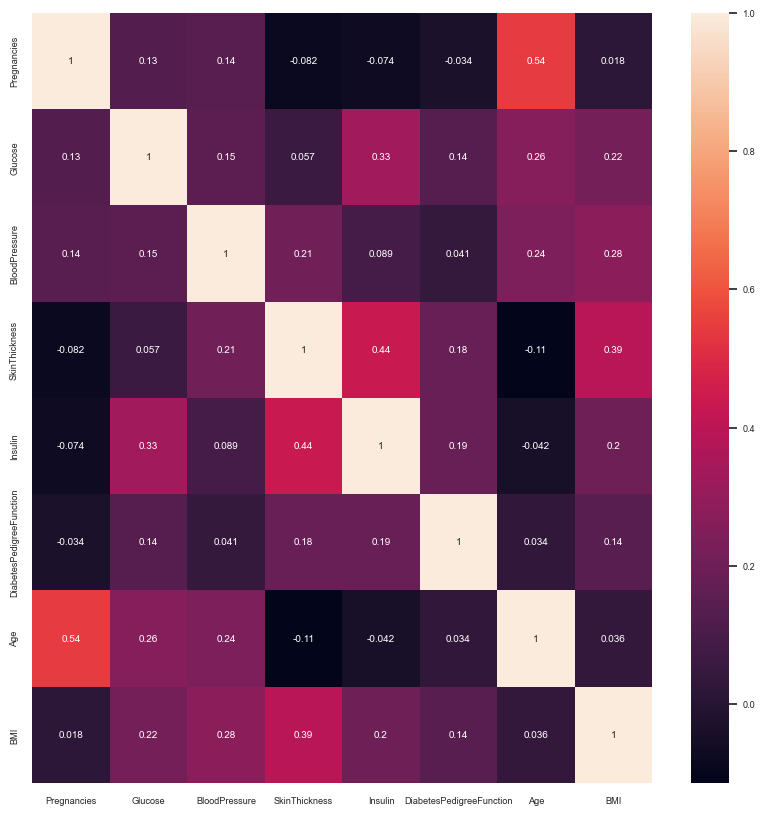

In [11]:
# Check the correlations - sol1. heatmap
# If corr >= 0.3, positive-correlated and if corr >= 0.7, high correlated
# If corr <= -0.3, negative-correlated and if corr <= -0.7, high correlated
df_corr = df.corr()

plt.figure(figsize=(10, 10))
sns.set(font_scale=0.6)
sns.heatmap(data=df_corr, annot=True)
plt.show()

# 'Glucose' is positive-correlated with 'Outcome'

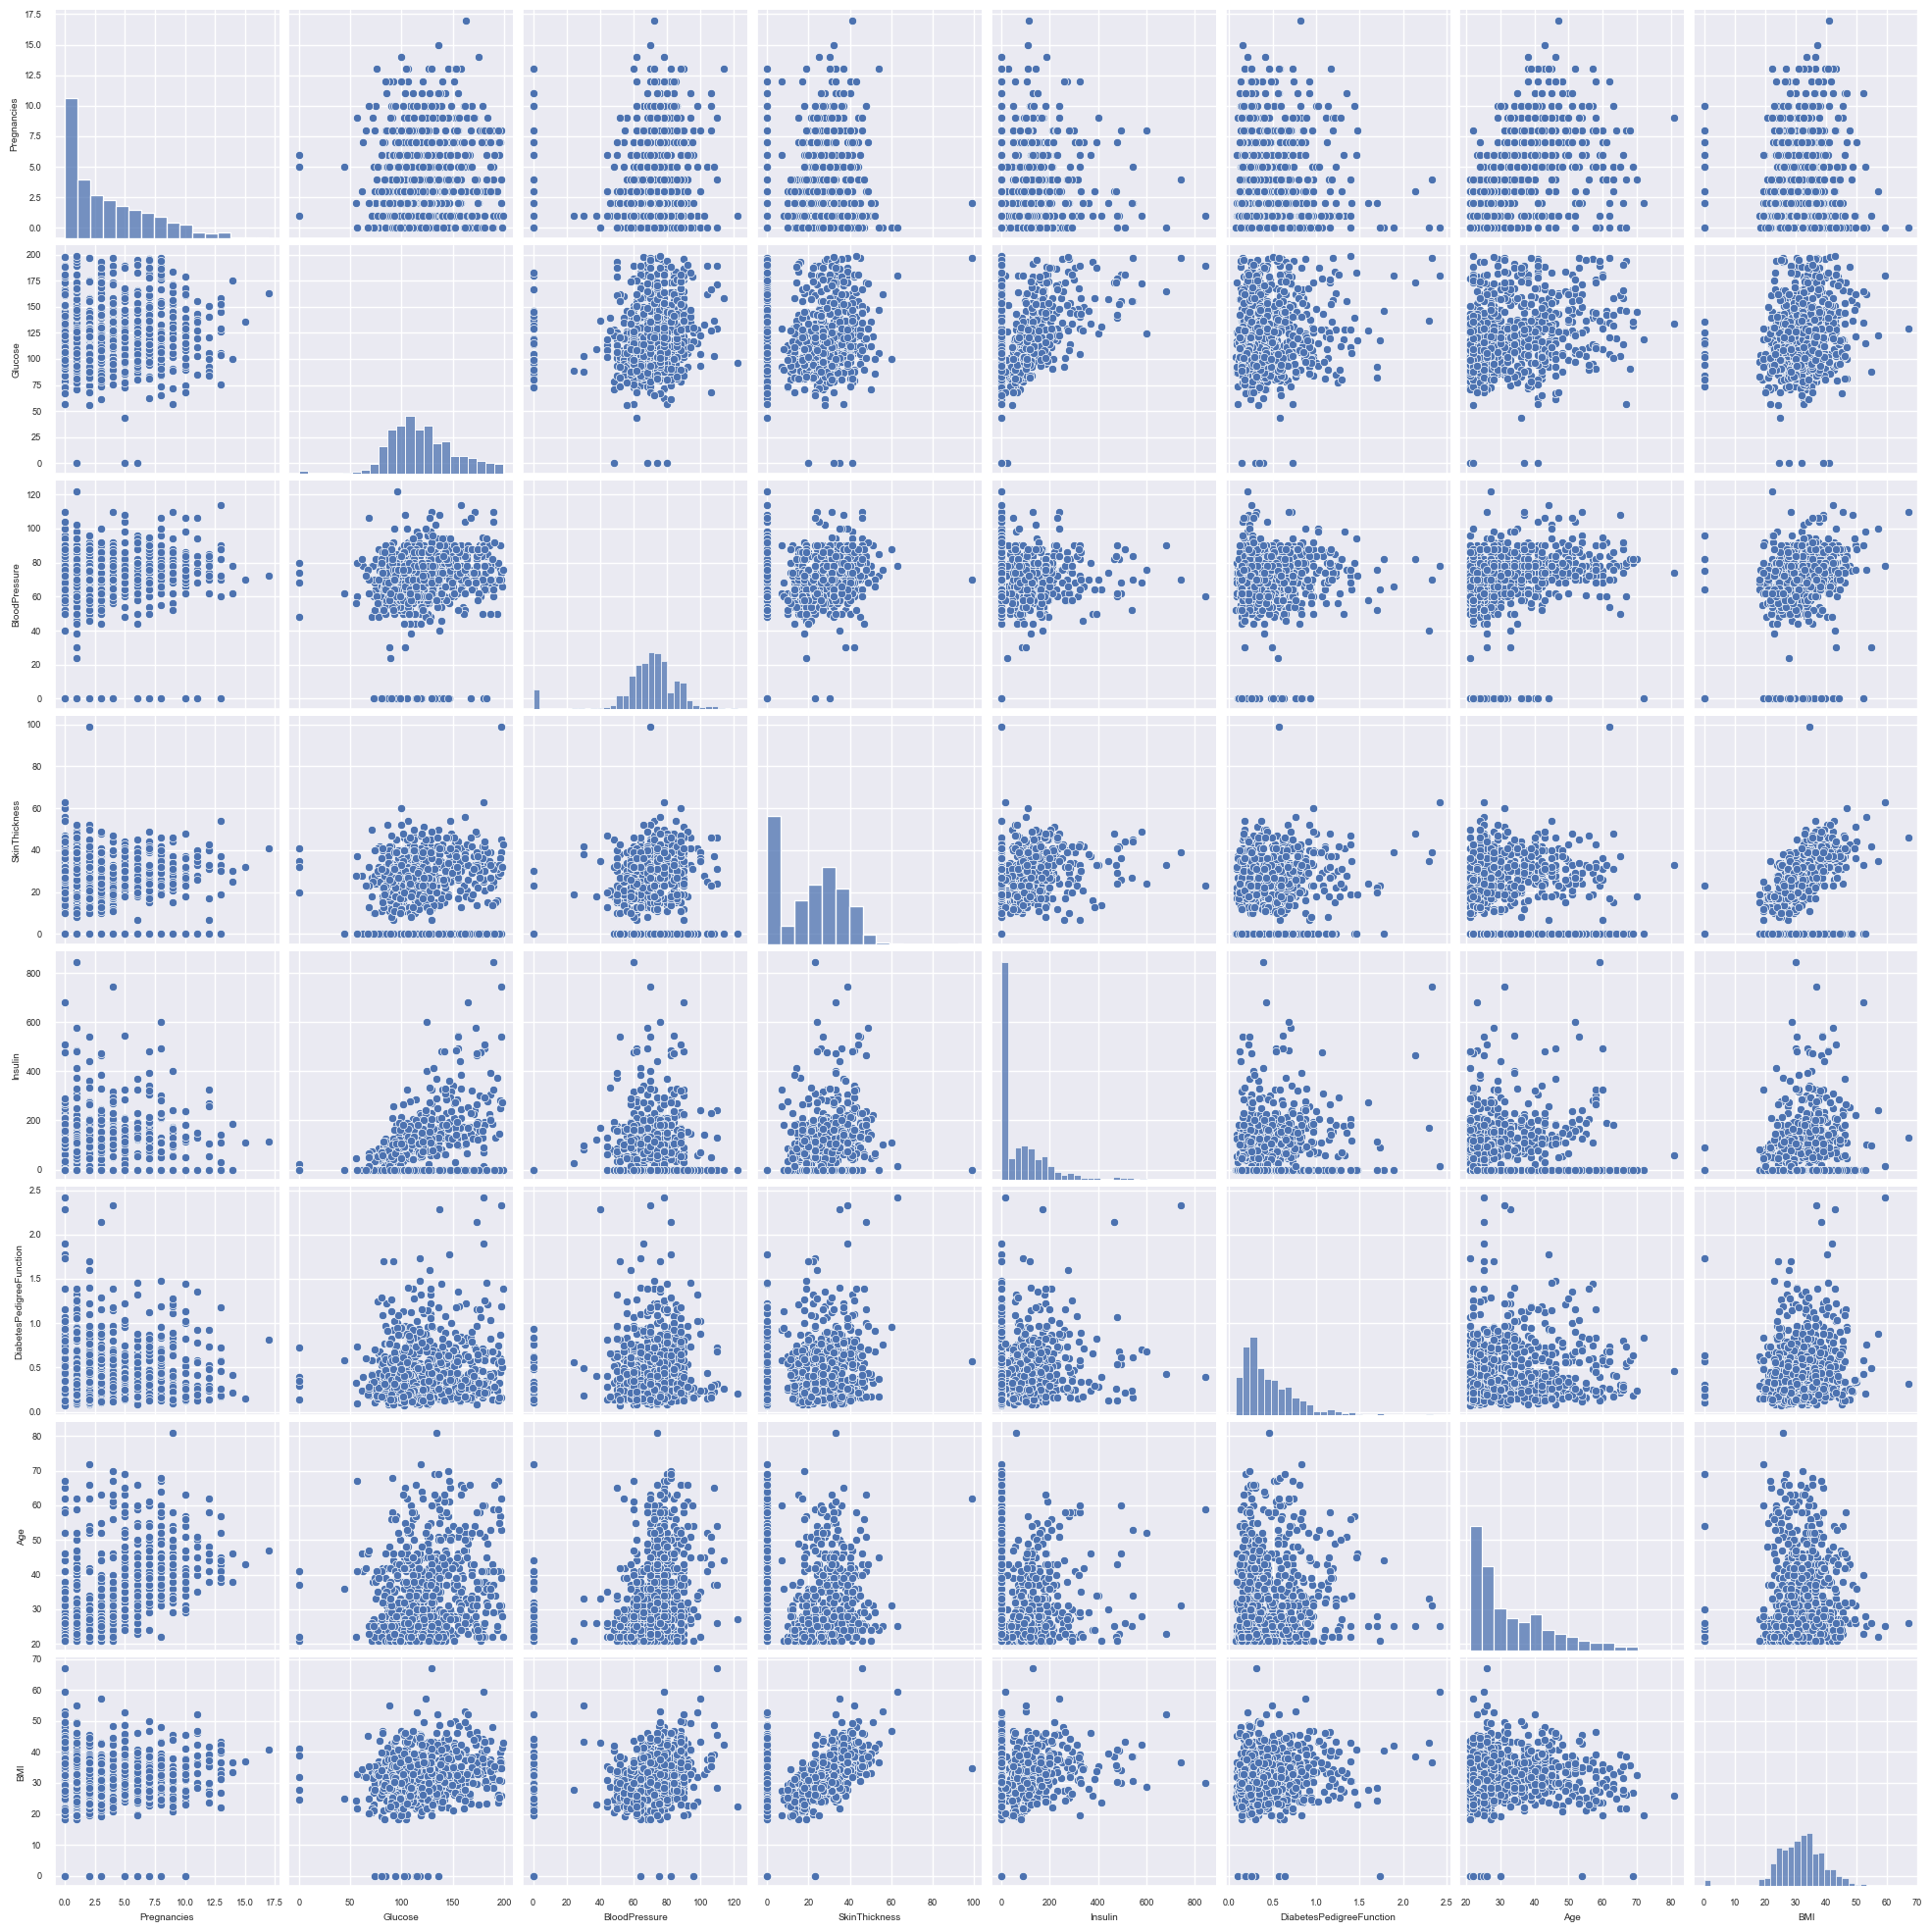

In [12]:
# # Check the correlations - sol2. pairplot
sns.pairplot(data=df,
             vars=df.columns)

plt.show()

In [13]:
# cf. 해당 색상들이 순서대로 부여됨 즉, blue=>label 0이고 orange=>label 1
sns.color_palette()

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

# 1. DL

## 1.0. Split the dataset

In [14]:
# Split the dataset into features(X) and label(y)
X = df.drop('BMI', axis=1).to_numpy()
y = df['BMI'].to_numpy()

In [15]:
# 최종 확인
print(f"X: \n  type: {type(X)} \n  shape: {X.shape}")
print(f"X.head: \n{X[:5]} \n")
print(f"y: \n  type: {type(y)} \n  shape: {y.shape}")
print(f"y.head: \n{y[:5]} \n")

X: 
  type: <class 'numpy.ndarray'> 
  shape: (768, 7)
X.head: 
[[6.000e+00 1.480e+02 7.200e+01 3.500e+01 0.000e+00 6.270e-01 5.000e+01]
 [1.000e+00 8.500e+01 6.600e+01 2.900e+01 0.000e+00 3.510e-01 3.100e+01]
 [8.000e+00 1.830e+02 6.400e+01 0.000e+00 0.000e+00 6.720e-01 3.200e+01]
 [1.000e+00 8.900e+01 6.600e+01 2.300e+01 9.400e+01 1.670e-01 2.100e+01]
 [0.000e+00 1.370e+02 4.000e+01 3.500e+01 1.680e+02 2.288e+00 3.300e+01]] 

y: 
  type: <class 'numpy.ndarray'> 
  shape: (768,)
y.head: 
[33.6 26.6 23.3 28.1 43.1] 



> **cf. [pandas.DataFrame.drop — pandas 2.2.2 documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)**  
Drop specified labels from rows or columns.  
Remove rows or columns by specifying label names and corresponding axis, or by directly specifying index or column names. When using a multi-index, labels on different levels can be removed by specifying the level. See the user guide for more information about the now unused levels.    
**cf. [09-04. 행/열 삭제 (drop) - [Python 완전정복 시리즈] 2편 : Pandas DataFrame 완전정복](https://wikidocs.net/154050)**

> **cf. [pandas.DataFrame.to_numpy — pandas 2.2.2 documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html)**  
Convert the DataFrame to a NumPy array.  
By default, the dtype of the returned array will be the common NumPy dtype of all types in the DataFrame. For example, if the dtypes are float16 and float32, the results dtype will be float32. This may require copying data and coercing values, which may be expensive.
>    > **`.to_numpy()` 대신에 `.values`를 사용하는 코드들도 존재한다.**  
>    > **cf. [DOC: warning against use of .values should show difference compared to to_numpy()/array · Issue #48425 · pandas-dev/pandas](https://github.com/pandas-dev/pandas/issues/48425)**  
>    > Both methods will produce the same output. However, `.to_numpy()` is preferred for its flexibility and better integration with Pandas.

In [16]:
# Split the dataset into train_set and test_set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)
print(f"X_train: Shape {X_train.shape} \nX_test:  Shape {X_test.shape}")
print(f"y_train: Shape {y_train.shape} \ny_test:  Shape {y_test.shape}")

'''
classification인 경우에는 다음과 같이 'stratify' parameter를 사용할 수 있다.
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    shuffle=True,
                                                    random_state=42)
'''

X_train: Shape (614, 7) 
X_test:  Shape (154, 7)
y_train: Shape (614,) 
y_test:  Shape (154,)


"\nclassification인 경우에는 다음과 같이 'stratify' parameter를 사용할 수 있다.\nX_train, X_test, y_train, y_test = train_test_split(X, y,\n                                                    test_size=0.2,\n                                                    stratify=y,\n                                                    shuffle=True,\n                                                    random_state=42)\n"

In [17]:
# Standardize the features scale
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"X_train.head \n{X_train[:5]} \n")
print(f"X_train_scaled.head \n{X_train_scaled[:5]}")

X_train.head 
[[2.000e+00 8.400e+01 0.000e+00 0.000e+00 0.000e+00 3.040e-01 2.100e+01]
 [9.000e+00 1.120e+02 8.200e+01 2.400e+01 0.000e+00 1.282e+00 5.000e+01]
 [1.000e+00 1.390e+02 4.600e+01 1.900e+01 8.300e+01 6.540e-01 2.200e+01]
 [0.000e+00 1.610e+02 5.000e+01 0.000e+00 0.000e+00 2.540e-01 6.500e+01]
 [6.000e+00 1.340e+02 8.000e+01 3.700e+01 3.700e+02 2.380e-01 4.600e+01]] 

X_train_scaled.head 
[[-0.52639686 -1.15139792 -3.75268255 -1.32277365 -0.70120553 -0.49073479
  -1.03594038]
 [ 1.58804586 -0.27664283  0.68034485  0.23350519 -0.70120553  2.41502991
   1.48710085]
 [-0.82846011  0.56687102 -1.2658623  -0.09071957  0.01344832  0.54916055
  -0.94893896]
 [-1.13052335  1.2541786  -1.04961706 -1.32277365 -0.70120553 -0.63929127
   2.79212217]
 [ 0.68185612  0.41066475  0.57222224  1.07648956  2.48460077 -0.68682934
   1.13909516]]


> **cf. [StandardScaler — scikit-learn 1.5.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)**  
Standardize features by removing the mean and scaling to unit variance.  
The standard score of a sample x is calculated as:  
$ z = \frac{x-u}{s} $  
> * $z$: 표준화된 값
> * $x$: 표준화할 값
> * $u$: mean of the training samples
> * $s$: the standard deviation of the training samples

## 1.1. CNN; Convolutinal Neural Network

In [18]:
import tensorflow as tf
import tensorflow.keras as keras

2024-09-19 08:49:52.945730: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
# Convert to Sequential Data
# step1. define the converting function
def split_sequences(sequences, n_steps):
    # parameters
      # sequences: 기존 data instance들이 있는 array
      # n_steps  : 기존 data instance 몇 개를 하나로 묶을 것인지
    X = [] # sequential로 바뀔 array
    y = [] # sequential로 바뀔 array

    for i in range(len(sequences)): # 기존 array의 data instance 수
        end_idx = i + n_steps # (i+1)번 째 묶었을 때의 끝 index
        if (end_idx > len(sequences)): break # 끝까지 다 묶으면 break

        # i부터 end_idx까지 즉, 묶을 data instance 단위를 말함
        # [[x1, x2, x3, y], [x1, x2, x3, y], [x1, x2, x3, y]]
        seq_x = sequences[i:end_idx, :-1]
        seq_y = sequences[end_idx-1, -1]

        # 묶은 애들을 Sequential Dataset의 instance로 추가
        X.append(seq_x)
        y.append(seq_y)

    return np.array(X), np.array(y) # 완성된 Sequential Dataset을 return

**cf. `split_sequences(sequences, n_steps)` function**  
**parameters**  
* `sequences`: 기존 data instance들이 있는 array
* `n_steps`: 기존 data instance 몇 개를 하나로 묶을 것인지(3이라고 가정)

**`seq_x = sequences[i:end_idx, :-1]`**  
* 전체 dataset을 array로 나타낸 sequences는 다음과 같다.  
  $[x^1, x^2, x^3, ...]$

* 이때 각 data에는 features와 label이 순서대로 있으므로 풀어내면 다음과 같다.  
  $[ [x^1_1, x^1_2, x^1_3, y^1], [x^2_1, x^2_2, x^2_3, y^2], [x^3_1, x^3_2, x^3_3, y^3], ... ]$

* 이때 `sequences[i:end_idx]`는 다음을 의미한다.  
  sequences의 i(1)번 째 data인 $x^1$부터 end_idx(4)번 째 data인 $x^4$까지 즉,  
  $[ [x^1_1, x^1_2, x^1_3, y^1], [x^2_1, x^2_2, x^2_3, y^2], [x^3_1, x^3_2, x^3_3, y^3] ]$

* 그리고 `sequences[i:end_idx, -1]`에서 `-1`은 각 data의 index 0부터 index -1 전 까지만 선택함을 의미한다. 즉,  
  index `0`은 $x_1$이고, index `-1`은 $y$이므로 그 전인 $x_3$까지를 선택한다.

* 따라서 `sequences[i:end_idx, -1]`은 다음과 같다.  
  $[ [x^1_1, x^1_2, x^1_3], [x^2_1, x^2_2, x^2_3], [x^3_1, x^3_2, x^3_3] ]$

**`X.append(seq_x)`**  
* 위 과정에 의해서 `seq_x`는 다음과 같다.  
  seq_x = $[ [x^1_1, x^1_2, x^1_3], [x^2_1, x^2_2, x^2_3], [x^3_1, x^3_2, x^3_3] ]$

* 따라서 `X.append(seq_x)`는 `seq_x`를 X의 첫 번째 data instance로 추가하라는 의미이다.

* 이를 반복하면 다음과 같다.
  - X의 첫 번째 data instance: $[ [x^1_1, x^1_2, x^1_3], [x^2_1, x^2_2, x^2_3], [x^3_1, x^3_2, x^3_3] ]$
  - X의 두 번째 data instance: $[ [x^2_1, x^2_2, x^2_3], [x^3_1, x^3_2, x^3_3], [x^4_1, x^4_2, x^4_3] ]$
  - X의 세 번째 data instance: $...$

In [20]:
# X와 y의 dimension 일치시키기

# cf. X의 dimension은 2-dim이다
print(f"X_train_scaled: Shape {X_train_scaled.shape}") # prints (614, 8)
# cf. 하지만 y의 dimension은 1-dim이다
print(f"y_train: Shape {y_train.shape} \n")            # prints (614,)

# cf. X의 형태와 y의 형태 차이를 시각적으로 확인하기
print(f"X_train_scaled.head: \n{X_train_scaled[:5]} \n")
print(f"y_train.head: \n{y_train[:5]} \n")

# print("===== convert y. 1dim -> 2dim ===== \n")

### 아래로는 regression에서는 필요하지 않음 ###
# # y를 2-dim으로 변경하기
# y_train_array = np.array(y_train).reshape(-1, 1)
# y_test_array = np.array(y_test).reshape(-1, 1)
# # 변경 확인
# print(f"y_train_array: Shape {y_train_array.shape} \n") # prints (614, 1)
# print(f"y_train_array.head: \n{y_train_array[:5]} \n")

X_train_scaled: Shape (614, 7)
y_train: Shape (614,) 

X_train_scaled.head: 
[[-0.52639686 -1.15139792 -3.75268255 -1.32277365 -0.70120553 -0.49073479
  -1.03594038]
 [ 1.58804586 -0.27664283  0.68034485  0.23350519 -0.70120553  2.41502991
   1.48710085]
 [-0.82846011  0.56687102 -1.2658623  -0.09071957  0.01344832  0.54916055
  -0.94893896]
 [-1.13052335  1.2541786  -1.04961706 -1.32277365 -0.70120553 -0.63929127
   2.79212217]
 [ 0.68185612  0.41066475  0.57222224  1.07648956  2.48460077 -0.68682934
   1.13909516]] 

y_train.head: 
[ 0.  28.2 28.7 21.9 46.2] 



> **cf. [numpy.reshape — NumPy v2.1 Manual](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html)**  
Gives a new shape to an array without changing its data.  
**cf. [001 ~ 010 - 데이터 분석 입문자를 위한 파이썬 판다스 300제](https://wikidocs.net/125545#reshape)**

In [21]:
# X와 y를 하나로 합쳐서 Dataset으로 만들기 for Convert to Sequential Data
  # cf. 합치기 위해서 위에서 X와 y의 dimension을 맞춘 것임

# (614, 8)_train_X과 (614, 1)_train_y를 합쳐서,
# (614, 9)의 train_dataset 만들기
train_dataset = np.c_[X_train_scaled, y_train]

# (154, 8)_train_X과 (154, 1)_train_y를 합쳐서,
# (154, 9)의 train_dataset 만들기
test_dataset = np.c_[X_test_scaled, y_test]

# 확인
print(f"train_dataset.shape: \n{train_dataset.shape} \n")
print(f"test_dataset.shape: \n{test_dataset.shape} \n")

train_dataset.shape: 
(614, 8) 

test_dataset.shape: 
(154, 8) 



In [22]:
train_dataset[-3]

array([ 1.8901091 , -0.62029661,  0.89659009,  1.07648956, -0.70120553,
        1.981245  ,  0.44308379, 45.6       ])

> **cf. [numpy.c_ — NumPy v2.1 Manual](https://numpy.org/doc/stable/reference/generated/numpy.c_.html)**  
Translates slice objects to concatenation along the second axis.  
> ```python
> >>> np.c_[np.array([1,2,3]), np.array([4,5,6])]
> array([[1, 4],
>        [2, 5],
>        [3, 6]])
> ```

In [23]:
# Convert to Sequential Data

# 5개를 하나로 묶기
X_train_seq, y_train_seq = split_sequences(train_dataset, 5)
X_test_seq, y_test_seq = split_sequences(test_dataset, 5)

print(f"X_train_seq.shape: \n{X_train_seq.shape} \n")
print(f"X_test_seq.shape: \n{X_test_seq.shape} \n")

# data instance의 수가 614 -> 610, 154 -> 150으로 감소한 것에 주목
# sequential한 data instances 5개를 묶은 것이 하나의 data instance로 취급
# 즉, 하나의 data instance에는 features 8개짜리 5묶음이 있는 것

X_train_seq.shape: 
(610, 5, 7) 

X_test_seq.shape: 
(150, 5, 7) 



In [24]:
# sequential function 적용 확인
print(f"X_train_seq.head(2): \n{X_train_seq[:2]} \n")
print(f"y_train_seq.head(2): \n{y_train_seq[:2]} \n")
print(y_train_seq.shape)

# 얼핏 잘못보면 y_train_seq가 one-hot encoded라고 보일 수도 있는데, 아님.

X_train_seq.head(2): 
[[[-0.52639686 -1.15139792 -3.75268255 -1.32277365 -0.70120553
   -0.49073479 -1.03594038]
  [ 1.58804586 -0.27664283  0.68034485  0.23350519 -0.70120553
    2.41502991  1.48710085]
  [-0.82846011  0.56687102 -1.2658623  -0.09071957  0.01344832
    0.54916055 -0.94893896]
  [-1.13052335  1.2541786  -1.04961706 -1.32277365 -0.70120553
   -0.63929127  2.79212217]
  [ 0.68185612  0.41066475  0.57222224  1.07648956  2.48460077
   -0.68682934  1.13909516]]

 [[ 1.58804586 -0.27664283  0.68034485  0.23350519 -0.70120553
    2.41502991  1.48710085]
  [-0.82846011  0.56687102 -1.2658623  -0.09071957  0.01344832
    0.54916055 -0.94893896]
  [-1.13052335  1.2541786  -1.04961706 -1.32277365 -0.70120553
   -0.63929127  2.79212217]
  [ 0.68185612  0.41066475  0.57222224  1.07648956  2.48460077
   -0.68682934  1.13909516]
  [-0.82846011  0.28569974  0.03160914 -0.47978928  0.20287464
    0.00841497 -0.94893896]]] 

y_train_seq.head(2): 
[46.2 25.9] 

(610,)


In [25]:
# 사용할 data 정리
print(f"X_train_seq.shape: \n{X_train_seq.shape} \n")
print(f"y_train_seq.shape: \n{y_train_seq.shape} \n")
print(f"X_test_seq.shape: \n{X_test_seq.shape} \n")
print(f"y_test_seq.shape: \n{y_test_seq.shape} \n")

X_train_seq.shape: 
(610, 5, 7) 

y_train_seq.shape: 
(610,) 

X_test_seq.shape: 
(150, 5, 7) 

y_test_seq.shape: 
(150,) 



In [26]:
# Create the model
model = keras.Sequential()

# Add layers
model.add(keras.layers.Conv1D(filters=16,
                              kernel_size=3,
                              strides=1,
                              activation='relu',
                              input_shape=(5, 7),
                              name='conv1'))
# model.add(keras.layers.BatchNormalization()) # 배치정규화 아직 제대로 이해 못함
# Dense layer로 가기 전에 Flatten
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=16,
                             activation='relu',
                             name='dense1'))
model.add(keras.layers.Dense(units=64,
                             activation='relu',
                             name='dense2'))
model.add(keras.layers.Dropout(0.4))
### regression에서는 output layer에 activate하지 않음
model.add(keras.layers.Dense(units=1,
                             name='output'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv1D)              (None, 3, 16)             352       
                                                                 
 flatten (Flatten)           (None, 48)                0         
                                                                 
 dense1 (Dense)              (None, 16)                784       
                                                                 
 dense2 (Dense)              (None, 64)                1088      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 output (Dense)              (None, 1)                 65        
                                                                 
Total params: 2,289
Trainable params: 2,289
Non-trainabl

2024-09-19 08:49:56.137681: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [27]:
from keras.optimizers import Adam
import absl.logging
absl.logging.set_verbosity('error')  # absl의 경고 수준을 에러로만 제한

# Compile the model
model.compile(Adam(learning_rate=0.004), 
              loss='mean_squared_error', 
              metrics=['mean_squared_error'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model_diabetes_regression.kears',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train_seq, y_train_seq,
                    validation_split=0.2,
                    batch_size=None,
                    verbose=2,
                    epochs=200,
                    callbacks=[checkpoint_cb, early_stopping_cb])

# history = model.fit(X_train_scaled, y_train,
#                     validation_split=0.2,
#                     batch_size=None,
#                     verbose=2,
#                     epochs=200)

Epoch 1/200
INFO:tensorflow:Assets written to: best-cnn-model_diabetes_regression.kears/assets


INFO:tensorflow:Assets written to: best-cnn-model_diabetes_regression.kears/assets


16/16 - 1s - loss: 1049.1245 - mean_squared_error: 1049.1245 - val_loss: 960.4474 - val_mean_squared_error: 960.4474 - 1s/epoch - 85ms/step
Epoch 2/200
INFO:tensorflow:Assets written to: best-cnn-model_diabetes_regression.kears/assets


INFO:tensorflow:Assets written to: best-cnn-model_diabetes_regression.kears/assets


16/16 - 1s - loss: 694.3092 - mean_squared_error: 694.3092 - val_loss: 253.9790 - val_mean_squared_error: 253.9790 - 524ms/epoch - 33ms/step
Epoch 3/200
INFO:tensorflow:Assets written to: best-cnn-model_diabetes_regression.kears/assets


INFO:tensorflow:Assets written to: best-cnn-model_diabetes_regression.kears/assets


16/16 - 1s - loss: 194.0013 - mean_squared_error: 194.0013 - val_loss: 91.3110 - val_mean_squared_error: 91.3110 - 530ms/epoch - 33ms/step
Epoch 4/200
INFO:tensorflow:Assets written to: best-cnn-model_diabetes_regression.kears/assets


INFO:tensorflow:Assets written to: best-cnn-model_diabetes_regression.kears/assets


16/16 - 1s - loss: 122.9629 - mean_squared_error: 122.9629 - val_loss: 83.9444 - val_mean_squared_error: 83.9444 - 535ms/epoch - 33ms/step
Epoch 5/200
INFO:tensorflow:Assets written to: best-cnn-model_diabetes_regression.kears/assets


INFO:tensorflow:Assets written to: best-cnn-model_diabetes_regression.kears/assets


16/16 - 1s - loss: 102.6033 - mean_squared_error: 102.6033 - val_loss: 67.3174 - val_mean_squared_error: 67.3174 - 668ms/epoch - 42ms/step
Epoch 6/200
INFO:tensorflow:Assets written to: best-cnn-model_diabetes_regression.kears/assets


INFO:tensorflow:Assets written to: best-cnn-model_diabetes_regression.kears/assets


16/16 - 1s - loss: 92.0315 - mean_squared_error: 92.0315 - val_loss: 55.4375 - val_mean_squared_error: 55.4375 - 519ms/epoch - 32ms/step
Epoch 7/200
16/16 - 0s - loss: 89.5479 - mean_squared_error: 89.5479 - val_loss: 68.9458 - val_mean_squared_error: 68.9458 - 36ms/epoch - 2ms/step
Epoch 8/200
INFO:tensorflow:Assets written to: best-cnn-model_diabetes_regression.kears/assets


INFO:tensorflow:Assets written to: best-cnn-model_diabetes_regression.kears/assets


16/16 - 1s - loss: 81.1865 - mean_squared_error: 81.1865 - val_loss: 54.0903 - val_mean_squared_error: 54.0903 - 534ms/epoch - 33ms/step
Epoch 9/200
16/16 - 0s - loss: 74.4728 - mean_squared_error: 74.4728 - val_loss: 64.5637 - val_mean_squared_error: 64.5637 - 38ms/epoch - 2ms/step
Epoch 10/200
16/16 - 0s - loss: 73.7068 - mean_squared_error: 73.7068 - val_loss: 56.8280 - val_mean_squared_error: 56.8280 - 39ms/epoch - 2ms/step
Epoch 11/200
16/16 - 0s - loss: 73.2011 - mean_squared_error: 73.2011 - val_loss: 56.0481 - val_mean_squared_error: 56.0481 - 38ms/epoch - 2ms/step
Epoch 12/200
INFO:tensorflow:Assets written to: best-cnn-model_diabetes_regression.kears/assets


INFO:tensorflow:Assets written to: best-cnn-model_diabetes_regression.kears/assets


16/16 - 1s - loss: 67.4585 - mean_squared_error: 67.4585 - val_loss: 51.9283 - val_mean_squared_error: 51.9283 - 519ms/epoch - 32ms/step
Epoch 13/200
16/16 - 0s - loss: 66.1580 - mean_squared_error: 66.1580 - val_loss: 56.7934 - val_mean_squared_error: 56.7934 - 39ms/epoch - 2ms/step
Epoch 14/200
16/16 - 0s - loss: 61.4139 - mean_squared_error: 61.4139 - val_loss: 54.6283 - val_mean_squared_error: 54.6283 - 38ms/epoch - 2ms/step
Epoch 15/200
16/16 - 0s - loss: 63.5673 - mean_squared_error: 63.5673 - val_loss: 57.1589 - val_mean_squared_error: 57.1589 - 39ms/epoch - 2ms/step
Epoch 16/200
16/16 - 0s - loss: 64.0911 - mean_squared_error: 64.0911 - val_loss: 53.6819 - val_mean_squared_error: 53.6819 - 38ms/epoch - 2ms/step
Epoch 17/200
16/16 - 0s - loss: 64.0885 - mean_squared_error: 64.0885 - val_loss: 55.6227 - val_mean_squared_error: 55.6227 - 37ms/epoch - 2ms/step
Epoch 18/200
16/16 - 0s - loss: 58.4349 - mean_squared_error: 58.4349 - val_loss: 58.3658 - val_mean_squared_error: 58.3658

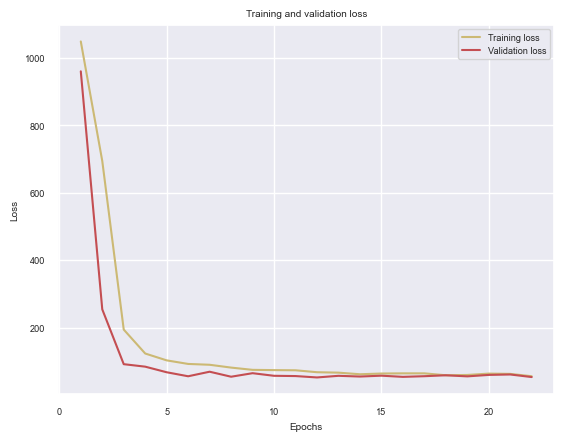

In [28]:
# Epoch에 따른 loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

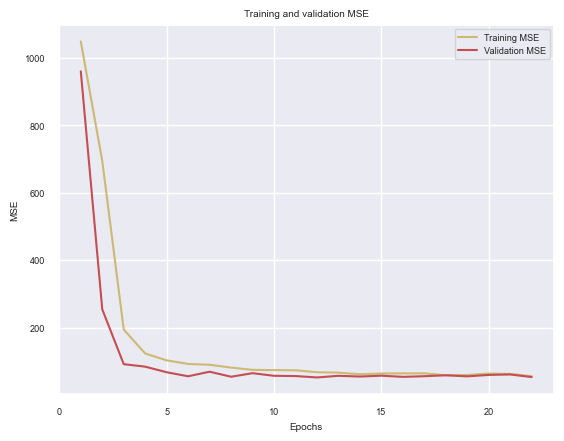

In [29]:
# Epoch에 따른 MSE
acc = history.history['mean_squared_error']
val_acc = history.history['val_mean_squared_error']
plt.plot(epochs, acc, 'y', label='Training MSE')
plt.plot(epochs, val_acc, 'r', label='Validation MSE')
plt.title('Training and validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [30]:
from sklearn.metrics import mean_squared_error

y_preds = model(X_test_seq)
print(f"MSE: {mean_squared_error(y_preds, y_test_seq)}")

MSE: 76.22355670416655


In [31]:
# output 확인
print(y_preds[:10])
print()
print(y_test_seq[:10])

tf.Tensor(
[[25.864414]
 [32.345646]
 [28.91931 ]
 [26.372898]
 [34.183846]
 [27.307255]
 [28.142965]
 [39.993946]
 [32.812252]
 [31.640783]], shape=(10, 1), dtype=float32)

[29.9 37.7 20.4 33.8 31.3 33.7 27.5 34.2 30.9 33.6]
